# Gravity



In [19]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate, optimize, spatial
from matplotlib import animation, rc
import sympy as sp
from PMD import PMD, distances, MetaForce
sp.init_printing(use_latex = "mathjax")
rc('animation', html='html5')
%matplotlib nbagg

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
class Gravity(MetaForce):
    """
    Gravity force.
    """
    
    def __init__(self, G = 1.):
        self.G = G
            
    
    def force(self, P, V):
        G = self.G
        m = self.master.m
        M = m * m[:, np.newaxis]
        D, R, U = distances(P)
        F = np.where(R[:,:,np.newaxis] != 0.,
             (G * M / R**2)[:,:,np.newaxis] * U, 
             0.).sum(axis = 0)
        return F
    
    
        
     
    

/home/lcharleux/Documents/Informatique/anaconda/envs/myconda1/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/lcharleux/Documents/Informatique/anaconda/envs/myconda1/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


<IPython.core.display.Javascript object>


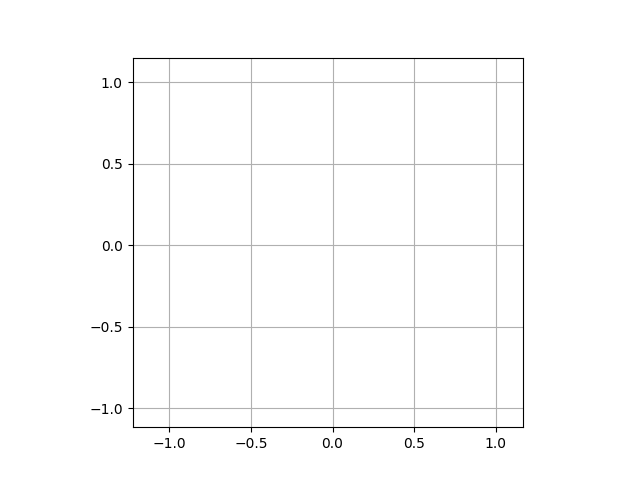

In [8]:
gravity = Gravity(G = 1.e-2)

nm = 4
P0 = (np.random.rand(nm, 2) *.5)
P0 -= P0.mean(axis = 0)
V0 = (np.random.rand(nm, 2) *.1) 
V0 -= V0.mean(axis = 0)
pcolors = "r"
tcolors = "k"
m = np.ones(nm)*1.e0



s = PMD(m, P0, V0, force = gravity, nk = 5000)      
dt = 0.02
nt = 100
s.solve(dt, nt)


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.set_aspect("equal")
margin = 1.
plt.xlim(P0[:,0].min() - margin, P0[:,0].max() + margin)
plt.ylim(P0[:,1].min() - margin, P0[:,1].max() + margin)
plt.grid()
#ax.axis("off")
points = []

msize = 10. * (s.m / s.m.max())**(1./6.)
for i in range(nm):
    plc = len(pcolors)
    pc = pcolors[i%plc]
    tlc = len(tcolors)
    tc = tcolors[i%tlc]
    trail, = ax.plot([], [], "-"+tc)
    point, = ax.plot([], [], "o"+pc, markersize = msize[i])
    points.append(point)
    points.append(trail)

    
def init():
    for i in range(2 * nm):
        points[i].set_data([], [])
    return points 

def animate(i):
    s.solve(dt, nt)#, rtol = 1.e-8, atol = 1.e-8)
    x, y = s.xy()
    for i in range(nm):
        points[2*i].set_data(x[i:i+1], y[i:i+1])
        xt, yt = s.trail(i)
        points[2*i+1].set_data(xt, yt)
    return points

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=400, interval=20, blit=True)

"""
plt.close()
anim
"""
plt.show()

In [ ]:
morse.a = 3


In [ ]:
s.positions()

In [ ]:
D, R, U = distances(s.positions())
(U[:,:,0]**2 + U[:,:,1]**2)**.5

In [ ]:
R

In [ ]:
R[1:,0].mean()

In [ ]:
P0 - P0.mean(axis = 0)


In [9]:
P0

/home/lcharleux/Documents/Informatique/anaconda/envs/myconda1/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/lcharleux/Documents/Informatique/anaconda/envs/myconda1/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


array([[ 0.17018914,  0.05807729],
       [-0.22556114,  0.15057361],
       [ 0.07773698, -0.09295816],
       [-0.02236499, -0.11569274]])

/home/lcharleux/Documents/Informatique/anaconda/envs/myconda1/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/lcharleux/Documents/Informatique/anaconda/envs/myconda1/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in multiply
  app.launch_new_instance()


In [18]:
P0 = np.random.rand(nm)